In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Exploratory data analysis to find missing values using seaborn(heatmap)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

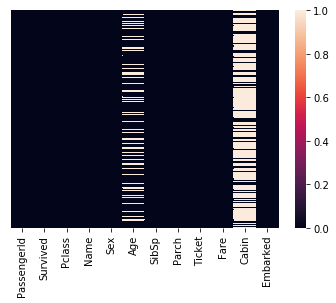

In [6]:
sns.heatmap(train.isnull(),yticklabels = False)

In [7]:
# Age and Cabin have Null values

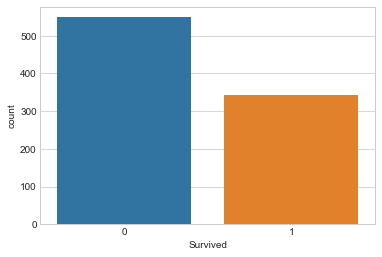

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train)

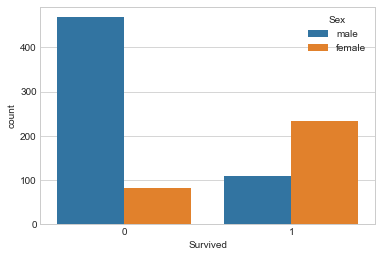

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train, hue = "Sex")

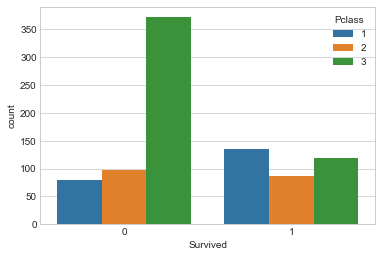

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = train, hue = "Pclass")

C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


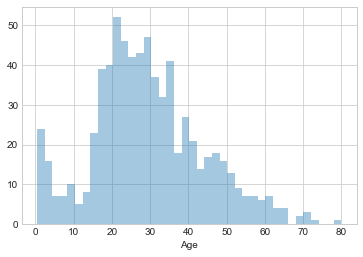

In [11]:
# Average age of the people in the boat
sns.distplot(train['Age'].dropna(),kde =False,bins = 40)
plt.show()

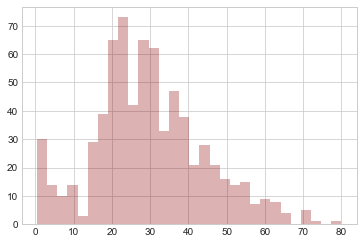

In [12]:
train['Age'].hist(bins = 30, color = 'darkred',alpha = 0.3)
plt.show()

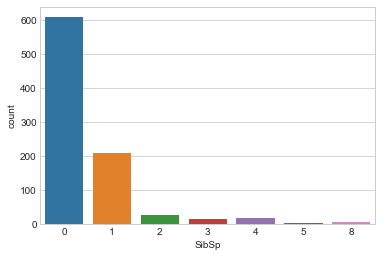

In [13]:
sns.countplot(x='SibSp', data = train)
plt.show()

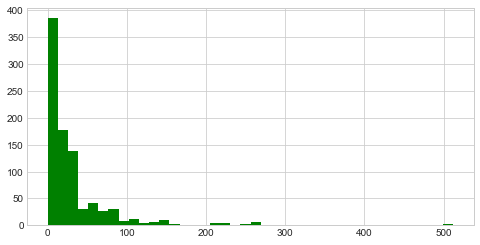

In [113]:
train['Fare'].hist(color='green', bins = 40, figsize = (8,4))

DATA CLEANING

We will fill missing age data with mean age and not by dropping missing age data row as we can lose many important data.

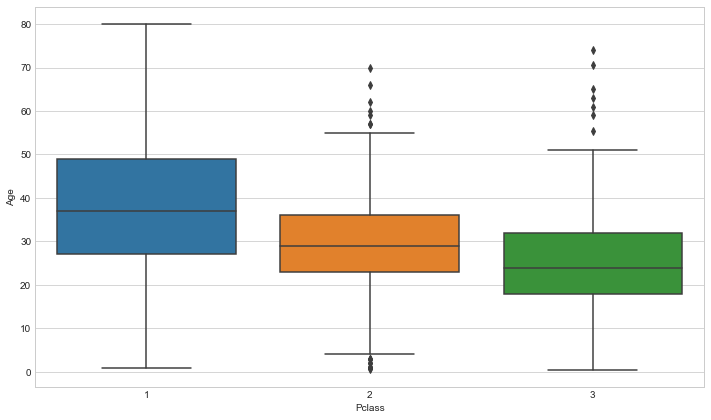

In [114]:
#As age has missing values we will remove it
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y = "Age", data = train)

In [115]:
# we can see passenger in higher class tend to be older which make sense
# Class1 = 37, Class2 = 29, Class3 = 24

In [116]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [117]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

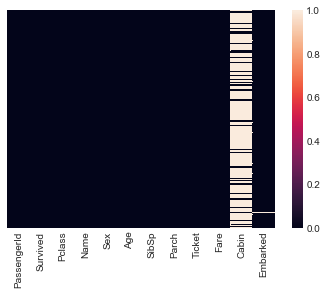

In [118]:
# Checking heat map
sns.heatmap(train.isnull(),yticklabels = False)

In [119]:
# Cabin has many null value to replace it we have to use feature engneering
#Therefore drp the Cabin Column and row in embarked that is Nan

In [120]:
train.drop('Cabin',axis = 1, inplace = True)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [122]:
train.dropna(inplace = True)

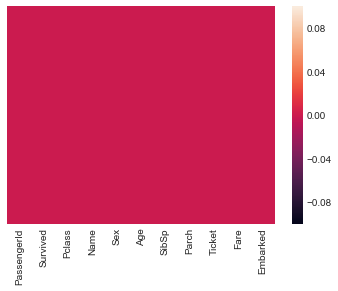

In [123]:
# checking with heatmap
sns.heatmap(train.isnull(), yticklabels= False, color = 'black')

In [124]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


CONVERTING CATEGORICAL DUMMIE
We have to convert categorical features into dummies using pandas. Otherwise our machine learning algo wont be able to directly take in those features as input 


In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [126]:
pd.get_dummies(train['Embarked'], drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [129]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [130]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [131]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [132]:
#We have dropped sex, embark therefore need to concat
train = pd.concat([train,sex,embark],axis = 1)

In [133]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


BUILDING LOGISTIC REGRESSION MODEL

TRAIN TEST SPLIT

In [134]:
# sURVIDED dependent rest independent
train.drop('Survived', axis =1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [135]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived', axis =1),train['Survived'], test_size = 0.30, random_state=101)

In [138]:
from sklearn.linear_model import LogisticRegression

In [143]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
LogisticRegression().fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
prediction = logmodel.predict(X_test)

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
accuracy = confusion_matrix(y_test,prediction)

In [151]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
accuracy = accuracy_score(y_test,prediction)

In [154]:
accuracy

0.8202247191011236

In [155]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [ ]:
Submit_EDA = pd.DataFrame({
     "Passenger_Id":["PassengerId"],
     "Survived":prediction
  })
Submit_EDA.to_csv('titanic_EDA.csv', index = False)

In [163]:
Submit_EDA

,Passenger_Id,Survived
0,PassengerId,0
1,PassengerId,0
2,PassengerId,1
3,PassengerId,1
4,PassengerId,0
5,PassengerId,0
6,PassengerId,0
7,PassengerId,0
8,PassengerId,0
9,PassengerId,1
